In [1]:
#importing basic libraries
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import Adam 
from keras.layers import Dropout

In [2]:
#reading the dataset
data=pd.read_csv("E:DataSet/forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [3]:
data=data.iloc[:, 2:]
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [5]:
labelencoder=preprocessing.LabelEncoder()
data['size_category']=labelencoder.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [6]:
array=data.values
x=array[:, :28]
y=array[:, 28]

### Building the Neural Network

In [10]:
model=Sequential()
model.add(Dense(12, input_dim=x.shape[1],kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x,y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 15ms/step - loss: 0.5978 - accuracy: 0.7543 - val_loss: 0.6997 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7572 - val_loss: 0.6596 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7572 - val_loss: 0.6419 - val_accuracy: 0.6784
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7601 - val_loss: 0.6719 - val_accuracy: 0.6842
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.7746 - val_loss: 0.6271 - val_accuracy: 0.7018
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7919 - val_loss: 0.5597 - val_accuracy: 0.7310
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.8208 - val_loss: 0.5025 - val_accuracy: 0.7661
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9711 - val_loss: 0.1834 - val_accuracy: 0.9298
Epoch 60/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9855 - val_loss: 0.0697 - val_accuracy: 0.9708
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9884 - val_loss: 0.0651 - val_accuracy: 0.9825
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0651 - val_accuracy: 0.9766
Epoch 63/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9913 - val_loss: 0.0768 - val_accuracy: 0.9766
Epoch 64/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0944 - val_accuracy: 0.9591
Epoch 65/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9855 - val_loss: 0.0718 - val_accuracy: 0.9474
Epoch 

In [15]:
scores=model.evaluate(x,y)
print(f"Accuracy: {model.metrics_names[1], scores[1]*100}%")

17/17 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9845
Accuracy: ('accuracy', 98.45260977745056)%


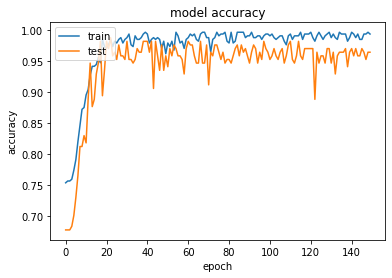

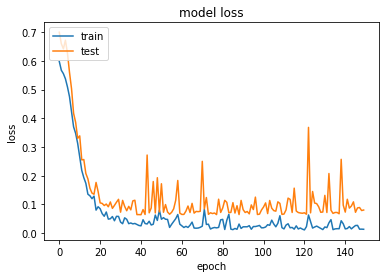

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()